# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions



In [1]:
# importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 4.1 Evaluating a model with `score` method

### For Classification Problem

In [2]:
# reading the data
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Importing RandomForestClassifier predictor class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setting a random seed
np.random.seed(27)

# Getting the data ready
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

# Instantiating and fitting the model
model = RandomForestClassifier().fit(X_train, y_train)

# Checking the accuracy
model.score(X_test, y_test)

0.7868852459016393

In [4]:
y_preds = model.predict(X_test)
y_preds[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [5]:
np.mean(y_preds == y_test)

0.7868852459016393

## For Regression Problem

In [6]:
# Importing Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [7]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Setting a random seed
np.random.seed(27)

# Getting the data ready
X = boston_df.drop('target', axis = 1)
y = boston_df['target']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

# Instantiating and fitting the model
model = RandomForestRegressor().fit(X_train, y_train)

# Checking the accuracy
model.score(X_test, y_test)

0.9033142910210461

`score()` uses different evaluation metrices depending on the model

* For `Classification`: mean accuracy
* For `Regression`: coefficient of determination or mean absolute error    

## 4.2 Evaluating a model using the `scoring` parameter

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(27)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [10]:
clf.score(X_test, y_test)

0.7868852459016393

In [11]:
cross_val_score(clf, X, y, cv=5)

array([0.80327869, 0.90163934, 0.80327869, 0.83333333, 0.78333333])

Reason behind five values in the output:

`cross_val_score()` creates n number of train and test sets (n can be specified by passing a number in cv parameter, by default it is 5) and evaluates the accuracy for each split. 

When using just one split, sometimes we may be lucky or unlucky and may get some accuracy that would show wrong results. So just to be sure this function creates n splits and evaluate the model on all these splits.

Finally we can take mean of all the accuracies and get a more precise accuracy for the model.

In [12]:
np.random.seed(27)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Comparing the two
clf_single_score, clf_cross_val_score

(0.7868852459016393, 0.8283060109289618)

The `scoring` parameter is by default set to `none` and can be set as per the need.
So in case of classifier it is the mean accuracy by defalut

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy** : How likely our model is going to predict a correct answer

In [13]:
np.random.seed(27)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train)
cross_val_score = cross_val_score(clf, X, y)

In [14]:
print(f'The Heart disease classifier cross-Validated accuracy : {np.mean(cross_val_score) * 100:.2f}%')

The Heart disease classifier cross-Validated accuracy : 82.50%


**Area under the reciever operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of model's true positive rate (tpr) versus model's false positive rate (fpr).

* True positive : model predicts 1 when the truth is 1
* False positive : model predicts 1 when the truth is 0
* True negative : model predicts 0 when the truth is 0
* Flase negative : model predicts 0 when the truth is 1

**https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5**

In [15]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.62, 0.38],
       [0.03, 0.97],
       [0.05, 0.95],
       [0.52, 0.48],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.87, 0.13],
       [0.03, 0.97],
       [0.63, 0.37],
       [0.88, 0.12]])

In [16]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.38, 0.97, 0.95, 0.48, 0.98, 1.  , 0.13, 0.97, 0.37, 0.12])

In [17]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.03703704, 0.07407407,
       0.07407407, 0.14814815, 0.14814815, 0.18518519, 0.22222222,
       0.22222222, 0.22222222, 0.33333333, 0.40740741, 0.44444444,
       0.59259259, 0.62962963, 0.62962963, 0.7037037 , 0.77777778,
       0.88888889, 0.96296296, 1.        ])

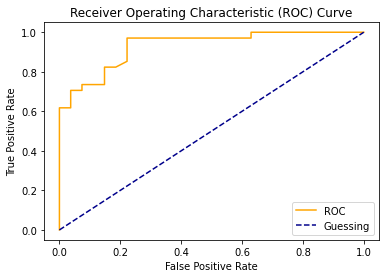

In [18]:
# Create a function for plotting ROC curve
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label = 'ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the label
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)    

The more the area under ROC curve the better is the classifying power of the model

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9308278867102396

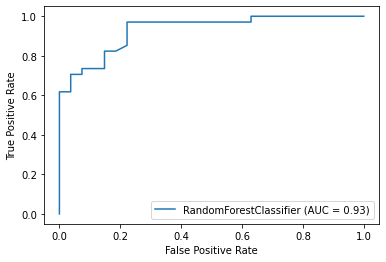

In [20]:
# Plotting ROC curve using Scikit-Learn
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)

This score represents the area under curve. 

The maximum score we can get is 1.0


**Confusion Matrix**

A confusion matrix is a quick way to compare the labels that our model predicts versus what it was supposed to predict.

In essence giving us an idea where our model is getting confused.

In [21]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_preds, y_test)

array([[23,  9],
       [ 4, 25]], dtype=int64)

In [22]:
# Visualize confusion matrix with pd.corosstab
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,4
1,9,25


The above table shows the number of times predicted values matched with the actual labels and also the times when they didn't match.

- The model predicted 0 when the actual label was also 0 23 times (True negative) whereas it predicted 0 when the actual label was 1 9 times (False negative).

- The model predicted 1 when the actual label was also 1 25 times (True positive) whereas it predicted 1 when the actual label was 0 4 times (False positive).


In [23]:
# Making our confusion matrix more visual using Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

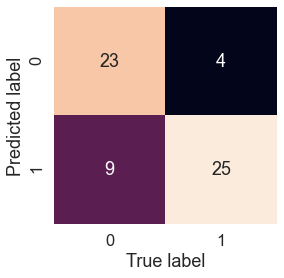

In [24]:
# Plotting it using Seaborn's heatmap()
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,
                annot=True,
                cbar = False);
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    
plot_conf_mat(conf_mat)    

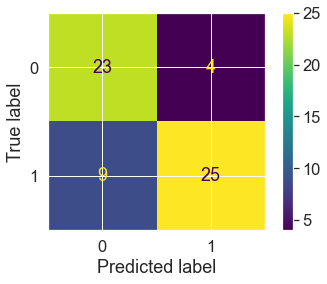

In [25]:
# Plotting confusion matrix using Scikit-Learn
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

**Classification Report**

The classification report is about key metrics in a classification problem.

https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.86      0.74      0.79        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



### 4.2.2 Regression model evaluation metrics

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

Compares the model's predictions with the mean of the targets. Values can range from negative infinity (very poor model) to 1. For example, if all our model predicts is mean of targets, it's R^2 value would be 0. And if our model perfectly predicts a range of numbers its R^2 is 1.

In [27]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Setting a random seed
np.random.seed(27)

# Getting the data ready
X = boston_df.drop('target', axis = 1)
y = boston_df['target']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

# Instantiating and fitting the model
model = RandomForestRegressor().fit(X_train, y_train)


0.9033142910210461

In [32]:
y_preds = model.predict(X_test)

In [30]:
# Evaluating the model (by defalut it is measured using R^2)
model.score(X_test, y_test) 

0.9033142910210461

In [34]:
# Using R^2 metric
from sklearn.metrics import r2_score

r2_score(y_test, y_preds)

0.9033142910210461

**Mean absolute error (MAE)**

MAE is the average of the absolute difference between the predicted values and actual values. It gives an idea of how wrong our model's predictions are.

In [39]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.0334705882352933

In [38]:
df = pd.DataFrame(data = {'Actual values': y_test,
                   'Predicted values': y_preds,
                   'Difference': y_test - y_preds})
df

,Actual values,Predicted values,Difference
427,10.9,16.750,-5.850
260,33.8,32.239,1.561
115,18.3,18.817,-0.517
398,5.0,7.622,-2.622
131,19.6,19.076,0.524
...,...,...,...
409,27.5,17.039,10.461
241,20.1,21.437,-1.337
65,23.5,23.847,-0.347
386,10.5,8.923,1.577


**Mean squared error (MSE)**

In [41]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds)

8.759936745098026

In [48]:
# Calculate MSE by hand
square = np.square(df['Difference']) # Squaring the difference 
square.mean() # Taking the mean

8.759936745098026

When to use which parameter :
https://towardsdatascience.com/metrics-to-understand-regression-models-in-plain-english-part-1-c902b2f4156f

### 4.2.3 Using `scoring` parameter

#### On classification model

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(27)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [76]:
clf.score(X_test, y_test)

0.7868852459016393

**scoring = 'accuracy'**

In [77]:
# Using scoring parameter
cv_acc = cross_val_score(clf, X, y, scoring = 'accuracy')
cv_acc

array([0.80327869, 0.90163934, 0.80327869, 0.83333333, 0.78333333])

In [78]:
print(f'The cross-validated accuracy using "accuracy" as scoring parameter is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy using "accuracy" as scoring parameter is: 82.50%


**scoring = 'precision'**

In [62]:
cv_precision = cross_val_score(clf, X_test, y_test, scoring = 'precision')

In [63]:
print(f'The cross-validated accuracy using "precision" as scoring parameter is: {np.mean(cv_precision)*100:.2f}%')

The cross-validated accuracy using "precision" as scoring parameter is: 82.14%


**scoring = 'recall'**

In [79]:
cv_recall = cross_val_score(clf, X, y, scoring = 'recall')

In [80]:
print(f'The cross-validated accuracy using "recall" as scoring parameter is: {np.mean(cv_recall)*100:.2f}%')

The cross-validated accuracy using "recall" as scoring parameter is: 86.67%


**scoring = 'f1'**

In [81]:
cv_acc = cross_val_score(clf, X, y, scoring = 'f1')

In [82]:
print(f'The cross-validated accuracy using "f1" as scoring parameter is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy using "f1" as scoring parameter is: 84.65%


#### On regression model

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(27)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [84]:
model.score(X_test, y_test)

0.9033142910210461

**scoring = 'r2' (r-squared)**

In [85]:
cv_r2 = cross_val_score(model, X, y, scoring = 'r2')

In [86]:
print(f'The cross-validated accuracy using "r2" as scoring parameter is: {np.mean(cv_r2)*100:.2f}%')

The cross-validated accuracy using "r2" as scoring parameter is: 62.98%


**scoring = 'neg_mean_absolute_error' (MAE)**

All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics. mean_squared_error , are available as neg_mean_squared_error which return the negated value of the metric.

In simple words, higher positive values shows that the score is good and thus can be deceiving therefore a negated value is returned.

In [88]:
cv_mae = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')

In [89]:
print(f'The cross-validated accuracy using "neg_mean_absolute_error" as scoring parameter is: {np.mean(cv_mae)*100:.2f}%')

The cross-validated accuracy using "neg_mean_absolute_error" as scoring parameter is: -303.13%


**scoring = 'neg_mean_squared_error (RMSE)'**

In [95]:
cv_mse = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error')

In [96]:
print(f'The cross-validated accuracy using "neg_mean_squared_error" as scoring parameter is: {np.mean(cv_mse)*100:.2f}%')

The cross-validated accuracy using "neg_mean_squared_error" as scoring parameter is: -2186.65%


## 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(27)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

y_preds = clf.predict(X_test)

# Evaluating the classifier 
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_preds)*100:.2f}%')
print(f'F1: {f1_score(y_test, y_preds)*100:.2f}%')

Accuracy: 78.69%
Precision: 86.21%
Recall: 73.53%
F1: 79.37%


**Regression evaluation metrics**

In [101]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(27)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor().fit(X_train, y_train)

y_preds = model.predict(X_test)

# Evaluating the regressor
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')
      

R^2: 0.9033142910210461
MAE: 2.0334705882352933
MSE: 8.759936745098026
